In [ ]:
%lsmagic


Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %shell  %store  %sx  %system  %tb  %tensorflow_version  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%bigquery  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%perl 

In [ ]:
%load_ext rpy2.ipython

/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex
/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:34: UserWarning: pandas >= 1.0 is not supported.
  warnings.warn('pandas >= 1.0 is not supported.')


#item item collaborative filtering


####Part 1 - Without Normalization

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import files
upload = files.upload()

Saving Assignment 5.xls to Assignment 5.xls


In [3]:
df_xls = pd.read_excel('Assignment 5.xls')

In [20]:
df_xls

,User,1: Toy Story (1995),1210: Star Wars: Episode VI - Return of the Jedi (1983),356: Forrest Gump (1994),"318: Shawshank Redemption, The (1994)","593: Silence of the Lambs, The (1991)",3578: Gladiator (2000),260: Star Wars: Episode IV - A New Hope (1977),2028: Saving Private Ryan (1998),296: Pulp Fiction (1994),1259: Stand by Me (1986),2396: Shakespeare in Love (1998),2916: Total Recall (1990),780: Independence Day (ID4) (1996),541: Blade Runner (1982),1265: Groundhog Day (1993),"2571: Matrix, The (1999)",527: Schindler's List (1993),"2762: Sixth Sense, The (1999)",1198: Raiders of the Lost Ark (1981),34: Babe (1995),Mean
0,755,2.00000,5.000000,2.000000,NaN,4.0000,4.000000,1.000000,2.000000,NaN,3.000000,2.00000,NaN,5.00000,2.000000,5.000000,4.000000,2.000000,5.000000,NaN,NaN,3.200000
1,5277,1.00000,NaN,NaN,2.000000,4.0000,2.000000,5.000000,NaN,NaN,4.000000,3.00000,2.00000,2.00000,NaN,2.000000,NaN,5.000000,1.000000,3.00000,NaN,2.769231
2,1577,NaN,NaN,NaN,5.000000,2.0000,NaN,NaN,NaN,NaN,1.000000,NaN,1.00000,4.00000,4.000000,1.000000,1.000000,2.000000,3.000000,1.00000,3.000000,2.333333
3,4388,2.00000,3.000000,NaN,NaN,NaN,1.000000,NaN,3.000000,4.000000,NaN,NaN,4.00000,NaN,3.000000,5.000000,NaN,5.000000,1.000000,1.00000,2.000000,2.833333
4,1202,NaN,3.000000,4.000000,1.000000,4.0000,1.000000,4.000000,4.000000,NaN,1.000000,5.00000,1.00000,NaN,4.000000,NaN,3.000000,5.000000,5.000000,NaN,NaN,3.214286
5,3823,3.00000,4.000000,4.000000,4.000000,NaN,NaN,2.000000,1.000000,4.000000,4.000000,5.00000,2.00000,4.00000,NaN,1.000000,NaN,NaN,3.000000,NaN,2.000000,3.071429
6,5448,NaN,NaN,3.000000,1.000000,1.0000,4.000000,4.000000,5.000000,2.000000,NaN,1.00000,NaN,NaN,3.000000,NaN,1.000000,NaN,NaN,5.00000,2.000000,2.666667
7,5347,2.00000,NaN,NaN,NaN,3.0000,2.000000,4.000000,NaN,3.000000,NaN,NaN,2.00000,1.00000,2.000000,4.000000,NaN,1.000000,3.000000,5.00000,NaN,2.666667
8,4117,4.00000,1.000000,NaN,4.000000,2.0000,4.000000,5.000000,4.000000,NaN,1.000000,2.00000,NaN,1.00000,NaN,5.000000,NaN,NaN,NaN,NaN,5.000000,3.166667
9,2765,4.00000,2.000000,NaN,5.000000,3.0000,NaN,4.000000,3.000000,4.000000,NaN,NaN,NaN,2.00000,NaN,NaN,2.000000,5.000000,1.000000,NaN,NaN,3.181818


In [21]:
df_xls.to_csv('UUCF Assignment Spreadsheet (3).csv')

In [22]:
df_xls

,User,1: Toy Story (1995),1210: Star Wars: Episode VI - Return of the Jedi (1983),356: Forrest Gump (1994),"318: Shawshank Redemption, The (1994)","593: Silence of the Lambs, The (1991)",3578: Gladiator (2000),260: Star Wars: Episode IV - A New Hope (1977),2028: Saving Private Ryan (1998),296: Pulp Fiction (1994),1259: Stand by Me (1986),2396: Shakespeare in Love (1998),2916: Total Recall (1990),780: Independence Day (ID4) (1996),541: Blade Runner (1982),1265: Groundhog Day (1993),"2571: Matrix, The (1999)",527: Schindler's List (1993),"2762: Sixth Sense, The (1999)",1198: Raiders of the Lost Ark (1981),34: Babe (1995),Mean
0,755,2.00000,5.000000,2.000000,NaN,4.0000,4.000000,1.000000,2.000000,NaN,3.000000,2.00000,NaN,5.00000,2.000000,5.000000,4.000000,2.000000,5.000000,NaN,NaN,3.200000
1,5277,1.00000,NaN,NaN,2.000000,4.0000,2.000000,5.000000,NaN,NaN,4.000000,3.00000,2.00000,2.00000,NaN,2.000000,NaN,5.000000,1.000000,3.00000,NaN,2.769231
2,1577,NaN,NaN,NaN,5.000000,2.0000,NaN,NaN,NaN,NaN,1.000000,NaN,1.00000,4.00000,4.000000,1.000000,1.000000,2.000000,3.000000,1.00000,3.000000,2.333333
3,4388,2.00000,3.000000,NaN,NaN,NaN,1.000000,NaN,3.000000,4.000000,NaN,NaN,4.00000,NaN,3.000000,5.000000,NaN,5.000000,1.000000,1.00000,2.000000,2.833333
4,1202,NaN,3.000000,4.000000,1.000000,4.0000,1.000000,4.000000,4.000000,NaN,1.000000,5.00000,1.00000,NaN,4.000000,NaN,3.000000,5.000000,5.000000,NaN,NaN,3.214286
5,3823,3.00000,4.000000,4.000000,4.000000,NaN,NaN,2.000000,1.000000,4.000000,4.000000,5.00000,2.00000,4.00000,NaN,1.000000,NaN,NaN,3.000000,NaN,2.000000,3.071429
6,5448,NaN,NaN,3.000000,1.000000,1.0000,4.000000,4.000000,5.000000,2.000000,NaN,1.00000,NaN,NaN,3.000000,NaN,1.000000,NaN,NaN,5.00000,2.000000,2.666667
7,5347,2.00000,NaN,NaN,NaN,3.0000,2.000000,4.000000,NaN,3.000000,NaN,NaN,2.00000,1.00000,2.000000,4.000000,NaN,1.000000,3.000000,5.00000,NaN,2.666667
8,4117,4.00000,1.000000,NaN,4.000000,2.0000,4.000000,5.000000,4.000000,NaN,1.000000,2.00000,NaN,1.00000,NaN,5.000000,NaN,NaN,NaN,NaN,5.000000,3.166667
9,2765,4.00000,2.000000,NaN,5.000000,3.0000,NaN,4.000000,3.000000,4.000000,NaN,NaN,NaN,2.00000,NaN,NaN,2.000000,5.000000,1.000000,NaN,NaN,3.181818


In [23]:
df1 = df_xls.iloc[:20,:21]

In [24]:
df1

,User,1: Toy Story (1995),1210: Star Wars: Episode VI - Return of the Jedi (1983),356: Forrest Gump (1994),"318: Shawshank Redemption, The (1994)","593: Silence of the Lambs, The (1991)",3578: Gladiator (2000),260: Star Wars: Episode IV - A New Hope (1977),2028: Saving Private Ryan (1998),296: Pulp Fiction (1994),1259: Stand by Me (1986),2396: Shakespeare in Love (1998),2916: Total Recall (1990),780: Independence Day (ID4) (1996),541: Blade Runner (1982),1265: Groundhog Day (1993),"2571: Matrix, The (1999)",527: Schindler's List (1993),"2762: Sixth Sense, The (1999)",1198: Raiders of the Lost Ark (1981),34: Babe (1995)
0,755,2.0,5.0,2.0,NaN,4.0,4.0,1.0,2.0,NaN,3.0,2.0,NaN,5.0,2.0,5.0,4.0,2.0,5.0,NaN,NaN
1,5277,1.0,NaN,NaN,2.0,4.0,2.0,5.0,NaN,NaN,4.0,3.0,2.0,2.0,NaN,2.0,NaN,5.0,1.0,3.0,NaN
2,1577,NaN,NaN,NaN,5.0,2.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,4.0,4.0,1.0,1.0,2.0,3.0,1.0,3.0
3,4388,2.0,3.0,NaN,NaN,NaN,1.0,NaN,3.0,4.0,NaN,NaN,4.0,NaN,3.0,5.0,NaN,5.0,1.0,1.0,2.0
4,1202,NaN,3.0,4.0,1.0,4.0,1.0,4.0,4.0,NaN,1.0,5.0,1.0,NaN,4.0,NaN,3.0,5.0,5.0,NaN,NaN
5,3823,3.0,4.0,4.0,4.0,NaN,NaN,2.0,1.0,4.0,4.0,5.0,2.0,4.0,NaN,1.0,NaN,NaN,3.0,NaN,2.0
6,5448,NaN,NaN,3.0,1.0,1.0,4.0,4.0,5.0,2.0,NaN,1.0,NaN,NaN,3.0,NaN,1.0,NaN,NaN,5.0,2.0
7,5347,2.0,NaN,NaN,NaN,3.0,2.0,4.0,NaN,3.0,NaN,NaN,2.0,1.0,2.0,4.0,NaN,1.0,3.0,5.0,NaN
8,4117,4.0,1.0,NaN,4.0,2.0,4.0,5.0,4.0,NaN,1.0,2.0,NaN,1.0,NaN,5.0,NaN,NaN,NaN,NaN,5.0
9,2765,4.0,2.0,NaN,5.0,3.0,NaN,4.0,3.0,4.0,NaN,NaN,NaN,2.0,NaN,NaN,2.0,5.0,1.0,NaN,NaN


In [10]:
df1.iloc[:,2:].values.T

array([[ 5., nan, nan,  3.,  3.,  4., nan, nan,  1.,  2.,  1.,  5., nan,
        nan,  4., nan, nan,  5.,  1.,  2.],
       [ 2., nan, nan, nan,  4.,  4.,  3., nan, nan, nan,  5.,  2., nan,
         3., nan,  1., nan,  1.,  3.,  2.],
       [nan,  2.,  5., nan,  1.,  4.,  1., nan,  4.,  5., nan, nan,  5.,
        nan, nan, nan, nan,  5., nan,  4.],
       [ 4.,  4.,  2., nan,  4., nan,  1.,  3.,  2.,  3., nan, nan,  4.,
         2.,  5.,  3., nan,  1., nan,  5.],
       [ 4.,  2., nan,  1.,  1., nan,  4.,  2.,  4., nan,  5., nan, nan,
        nan,  5.,  2., nan,  1.,  4., nan],
       [ 1.,  5., nan, nan,  4.,  2.,  4.,  4.,  5.,  4.,  2.,  3.,  2.,
         3.,  4., nan, nan,  4.,  5.,  1.],
       [ 2., nan, nan,  3.,  4.,  1.,  5., nan,  4.,  3., nan, nan,  5.,
        nan, nan,  2., nan, nan,  1.,  3.],
       [nan, nan, nan,  4., nan,  4.,  2.,  3., nan,  4., nan,  1., nan,
        nan,  3., nan,  2.,  5.,  3.,  2.],
       [ 3.,  4.,  1., nan,  1.,  4., nan, nan,  1., nan, nan, n

In [10]:
from sklearn.metrics.pairwise import cosine_similarity

In [12]:
cosin = cosine_similarity(df1.iloc[:,1:].fillna(0).T) #find cosine similarity between movies and at the case of cosine similarity

In [26]:
cosin #for better understanding as example for cosin similarity cosin[0] is the all movie similarity with 'Toy Story' and so on

array([[1.        , 0.64499528, 0.58053961, 0.66742381, 0.57022916,
        0.5878523 , 0.74740932, 0.53457863, 0.66784557, 0.49265895,
        0.37665889, 0.62305598, 0.69066536, 0.38306741, 0.6610164 ,
        0.50501003, 0.46381683, 0.42163702, 0.46681653, 0.61807005],
       [0.64499528, 1.        , 0.56302913, 0.45605174, 0.51656617,
        0.48318747, 0.58980521, 0.40875249, 0.68566227, 0.53432395,
        0.53342867, 0.39193435, 0.60585556, 0.51539686, 0.52695247,
        0.53567296, 0.57352941, 0.56529741, 0.25260359, 0.51157623],
       [0.58053961, 0.56302913, 1.        , 0.29304148, 0.3813458 ,
        0.56920942, 0.59555   , 0.46300266, 0.39911406, 0.52792558,
        0.64715313, 0.49149826, 0.49874139, 0.48771311, 0.29829011,
        0.63103891, 0.3204935 , 0.60294333, 0.28827545, 0.45684928],
       [0.66742381, 0.45605174, 0.29304148, 1.        , 0.58899985,
        0.21284627, 0.56557684, 0.59834433, 0.53821868, 0.34015067,
        0.32920265, 0.33267392, 0.61736585, 0

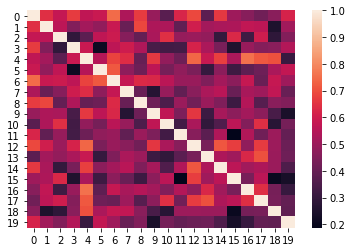

In [13]:
import seaborn as sns
sns.heatmap(cosin)# plot the heatmap of correlation matrix

In [14]:
uT = np.round(np.array(cosin[0]),decimals = 6)# convert all element of array a number upto 6 decimal places 

In [16]:
df1.iloc[:,1:].columns

Index(['1: Toy Story (1995)',
       '1210: Star Wars: Episode VI - Return of the Jedi (1983)',
       '356: Forrest Gump (1994)', '318: Shawshank Redemption, The (1994)',
       '593: Silence of the Lambs, The (1991)', '3578: Gladiator (2000)',
       '260: Star Wars: Episode IV - A New Hope (1977)',
       '2028: Saving Private Ryan (1998)', '296: Pulp Fiction (1994)',
       '1259: Stand by Me (1986)', '2396: Shakespeare in Love (1998)',
       '2916: Total Recall (1990)', '780: Independence Day (ID4) (1996)',
       '541: Blade Runner (1982)', '1265: Groundhog Day (1993)',
       '2571: Matrix, The (1999)', '527: Schindler's List (1993)',
       '2762: Sixth Sense, The (1999)', '1198: Raiders of the Lost Ark (1981)',
       '34: Babe (1995)'],
      dtype='object')

In [17]:
p = np.round(sorted(uT,reverse = True),decimals = 6) # sort the correlation matrix of user 3867 with other user

In [18]:
p

array([1.      , 0.747409, 0.690665, 0.667846, 0.667424, 0.661016,
       0.644995, 0.623056, 0.61807 , 0.587852, 0.58054 , 0.570229,
       0.534579, 0.50501 , 0.492659, 0.466817, 0.463817, 0.421637,
       0.383067, 0.376659])

In [19]:
for g in range(len(uT)):
  if(uT[g] == 0.747409):
    print(g)

6


In [20]:
c = 0
for j in df1.iloc[:,1:].columns:
  if(c==6):
    print(j)
  c+=1 # movie that have highest cosine similarity with 'Toy Story'

260: Star Wars: Episode IV - A New Hope (1977)


In [63]:
df1[df1.iloc[:,1:].columns].fillna(0).values[1]# this represent the 5577 user rating for all movie

array([1., 0., 0., 2., 4., 2., 5., 0., 0., 4., 3., 2., 2., 0., 2., 0., 5.,
       1., 3., 0.])

In [51]:
l = []
for i in range(len(df1.iloc[:,1:].columns)):
  l.append(np.matmul(df1[df1.iloc[:,1:].columns].fillna(0).values[1],cosin[i])/np.matmul(df1[df1.iloc[:,1:].columns].notnull().astype('int').values[1],cosin[i]))# fill nan value with 0 and compute predicted rating for every movie for user 5577 so we use index of user 5577 from df1 
  # here 'df.notnull' is used to convert every number into 1 and convert nan value into 0
  # every prediction for every movie append to l

In [52]:
l

[2.6668982678575537,
 2.774215215830409,
 2.7085502730962276,
 2.723963100019468,
 2.8833041592722903,
 2.8097667519781764,
 2.922240134334374,
 2.7802181220722755,
 2.8027971011907162,
 2.928800897866899,
 2.852130587480598,
 2.7018261412839557,
 2.6749509995371694,
 2.7842520940793496,
 2.6907197332431223,
 2.770176203123428,
 2.9738833825830233,
 2.7162671331726407,
 2.8181547746216626,
 2.610945418586956]

In [41]:
l = np.round(l,decimals = 3)

In [53]:
l

[2.6668982678575537,
 2.774215215830409,
 2.7085502730962276,
 2.723963100019468,
 2.8833041592722903,
 2.8097667519781764,
 2.922240134334374,
 2.7802181220722755,
 2.8027971011907162,
 2.928800897866899,
 2.852130587480598,
 2.7018261412839557,
 2.6749509995371694,
 2.7842520940793496,
 2.6907197332431223,
 2.770176203123428,
 2.9738833825830233,
 2.7162671331726407,
 2.8181547746216626,
 2.610945418586956]

In [59]:
p1 = sorted(l,reverse = True)

In [60]:
p1 # this all the prediction of movie for user 5277 based on unnormalized item item collaborating filtering

[2.9738833825830233,
 2.928800897866899,
 2.922240134334374,
 2.8833041592722903,
 2.852130587480598,
 2.8181547746216626,
 2.8097667519781764,
 2.8027971011907162,
 2.7842520940793496,
 2.7802181220722755,
 2.774215215830409,
 2.770176203123428,
 2.723963100019468,
 2.7162671331726407,
 2.7085502730962276,
 2.7018261412839557,
 2.6907197332431223,
 2.6749509995371694,
 2.6668982678575537,
 2.610945418586956]

In [61]:
for g in range(len(l)):
  if(l[g] == 2.9738833825830233):
    print(g)

16


In [64]:
c = 0
for j in df1.iloc[:,1:].columns:
  if(c==16):
    print(j)
  c+=1#the highest recommanded movie  for user 5277

527: Schindler's List (1993)
